# TP3 Introduction à la classification

<p>
L’objectif de ce TP est de programmer et de tester deux algorithmes de classification,
très simples mais très efficaces : l’algorithme du Plus Proche Voisin (PPV) et le Classifieur
Bayesien Naïf (CBN). Nous n’étudions ici que les versions les plus simple de ces
algorithmes.
</p>

<p>
Pour ce TP nous aurons besoin d’importer sklearn et numpy. Les test pourront se faire sur
les données (data) prédéfinies de sklearn qui sont fournies avec leurs étiquettes de classe
(target), par exemple :
</p>


### Importing Libraries and Loading Datasets

In [26]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
Y = iris.target

## Plus Proche Voisin
***

<p>
L’algorithme du Plus Proche Voisin est un algorithme très simple de classification qui
repose sur le principe suivant : la classe de chaque donnée de test (à classer) doit être la
classe de la donnée la plus proche (le plus similaire) parmi les données d’apprentissage.
</p>

Liste de fonctions utiles :

- **metrics.pairwise.euclidean_distances :** calcule des distances entre données.
- **argsort, argmin, argmax :** renvoie les indices des valeurs ordonnées, minimales et maximales.
- **neighbors.KNeighborsClassifier :** l’algorithme des K Plus Proches Voisins de sklearn.

### Créez une fonction PPV(X,Y) qui prend en entrée des données X et des étiquettes Y et qui renvoie une étiquette, pour chaque donnée, prédite à partir du plus proche voisin de cette donnée. Ici on prend chaque donnée, une par une, comme donnée de test et on considère toutes les autres comme données d’apprentissage. Cela nous permet de tester la puissance de notre algorithme selon une méthode de validation par validation croisée (cross validation) de type “leave one out”.

Pour appliquer cette méthode, les étapes à suivre sont les suivantes :

1. Charger les données
2. Initialiser k au nombre de plus proches voisins choisi
3. Pour chaque exemple dans les données:<br>
3.1 Calculer la distance entre notre requête et l’observation itérative actuelle de la boucle depuis les données.<br>
3.2 Ajouter la distance et l’indice de l’observation concernée à une collection ordonnée de données<br>
4. Trier cette collection ordonnée contenant distances et indices de la plus petite distance à la plus grande (dans ordre croissant).
5. Sélectionner les k premières entrées de la collection de données triées (équivalent aux k plus proches voisins)
6. Obtenir les étiquettes des k entrées sélectionnées
7. Si régression, retourner la moyenne des k étiquettes
8. Si classification, retourner le mode (valeur la plus fréquente/commune) des k étiquettes

In [27]:
from sklearn.metrics.pairwise import euclidean_distances

def PPV(X,Y):
    Yhat = np.zeros(len(X))
    # 3. Pour chaque observation des données
    for index, x in enumerate(X):
        #delete variable from training data
        X_train = np.delete(X, index, 0)
        #delete variable classe name from training targets
        Y_train = np.delete(Y, index, 0)

        # 3.Calculer la distance entre notre requête et l'observation itérative actuelle
        # de la boucle depuis les données et chaque donnees qui rest .
        distance = euclidean_distances(X_train, [x])

        # Select class of the closest data
        min_dist_idx = np.argmin(distance)

        Yhat[index] = Y_train[min_dist_idx]
    
    return Yhat

PPV(X,Y)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

### La fonction PPV calcule une étiquette prédite pour chaque donnée. Modifiez la fonction pour calculer et renvoyer l’erreur de prédiction : c’est à dire le pourcentage d’étiquettes mal prédites.

In [28]:
def error(Y, Yhat):
    cmp = 0
    for y, yh in zip(Y, Yhat):
        if y != yh:
            cmp += 1
    return float(cmp*100) / float(len(Y))

In [29]:
from sklearn.metrics.pairwise import euclidean_distances

def PPV(X,Y):
    Yhat = np.zeros(len(X))
    # 3. Pour chaque observation des données
    for index, x in enumerate(X):
        #delete variable from training data
        X_train = np.delete(X, index, 0)
        #delete variable classe name from training targets
        Y_train = np.delete(Y, index, 0)

        # 3.Calculer la distance entre notre requête et l'observation itérative actuelle
        # de la boucle depuis les données et chaque donnees qui rest .
        distance = euclidean_distances(X_train, [x])

        # Select class of the closest data
        min_dist_idx = np.argmin(distance)

        Yhat[index] = Y_train[min_dist_idx]
    
    return error(Y,Yhat), Yhat


### Testez sur les données Iris.

In [30]:
PPV(X,Y)[0]

4.0

### Testez la fonction des K Plus Proches Voisins de sklearn (avec ici K = 1). Les résultats sont-ils différents ? Testez avec d’autres valeurs de K.

100%|██████████| 49/49 [00:00<00:00, 214.87it/s]
The best accuracy was with 0.9666666666666667 with k= 3


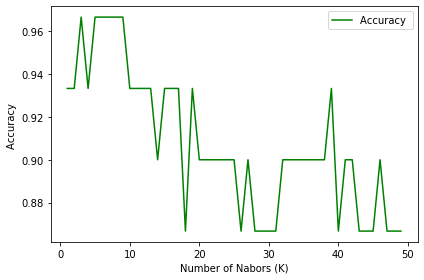

In [31]:
from sklearn.model_selection import train_test_split
import random
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier

def bestK_KNN(X_train, y_train, X_test, y_test):
    Ks = 50
    mean_acc = np.zeros((Ks-1))
    for n in tqdm(range(1,Ks)):
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        mean_acc[n-1] = neigh.score(X_test, y_test)

    plt.plot(range(1,Ks),mean_acc,'g')
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Nabors (K)')
    plt.tight_layout()
    plt.show()
    print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
    # return mean_acc.argmax()+1 , mean_acc.max()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random.seed())

bestK_KNN(X_train, y_train, X_test, y_test)

In [32]:
def KNN(X, Y, k):
    KNN = KNeighborsClassifier(n_neighbors = k)

    Yhat = []
    for index, x in enumerate(X):
        X_train = np.delete(X, index, 0)
        Y_train = np.delete(Y, index, 0)

        KNN.fit(X_train, Y_train)
        
        Yhat.append(KNN.predict( [x] ))

    return error(Y, Yhat), Yhat

KNN(X, Y, 1)[0]

4.0

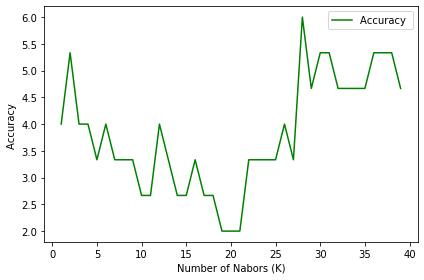

The best accuracy was with 2.0 with k= 19


In [33]:
Ks = 40
errors = []
for i in range(1,Ks):
    errors.append( KNN(X,Y,i)[0] )

plt.plot(range(1,Ks), errors,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", np.min(errors), "with k=", np.argmin(errors)+1) 

### BONUS : Modifiez la fonction PPV pour qu’elle prenne en entrée un nombre K de voisins (au lieu de 1). La classe prédite sera alors la classe majoritaire parmi les K voisins.

In [34]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy import stats

def PPV2(X, Y, k=10):
    Yhat = np.zeros(len(X))
    # 3. Pour chaque observation des données
    for index, x in enumerate(X):
        #delete variable from training data
        X_train = np.delete(X, index, 0)
        #delete variable classe name from training targets
        Y_train = np.delete(Y, index, 0)

        # 3.Calculer la distance entre notre requête et l'observation itérative actuelle
        # de la boucle depuis les données et chaque donnees qui rest .
        distance = np.array(euclidean_distances(X_train, [x]).flatten())

        # 4. Trier cette collection ordonnée contenant distances et indices de
        # la plus petite distance à la plus grande (dans l'ordre croissant)
        sort_dist_id = distance.argsort()

        # 5. Sélectionner les k premières entrées de la précédente collection de données : sort_dist_id[:k]
        # 6. Obtenir les étiquettes des k entrées sélectionnées : [ Y_train[i] for i in sort_dist_id[:k] ]
        Yhat[index] = stats.mode( [ Y_train[i] for i in sort_dist_id[:k] ] )[0][0]
            
    return error(Y,Yhat), Yhat

PPV2(X,Y)[0]



2.0

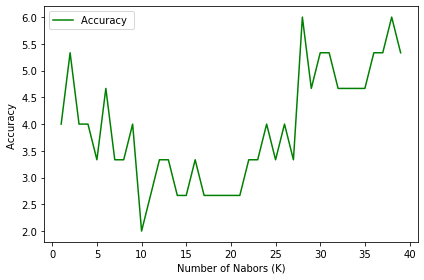

The best accuracy was with 2.0 with k= 10


5.333333333333333

In [38]:
errors = []
Ks = 40
for i in range(1, Ks):
    er = PPV2(X, Y, i)[0]
    errors.append(er)

plt.plot(range(1, Ks), errors,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", np.min(errors), "with k=", np.argmin(errors)+1) 

PPV2(X, Y, 2)[0]

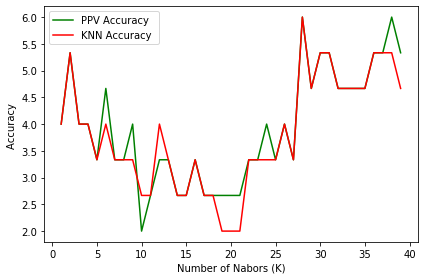

In [10]:
Ks = 40
errors1 = []
errors2 = []
for i in range(1, Ks):
    errors1.append( PPV2(X, Y, i)[0] )
    errors2.append( KNN(X, Y, i)[0] )

plt.plot(range(1, Ks), errors1,'g')
plt.plot(range(1, Ks), errors2,'r')
plt.legend(('PPV Accuracy', 'KNN Accuracy '))

plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

## Classifieur Bayesien Naïf
***

<p>
L’algorithme du Classifieur Bayesien Naïf est un algorithme de classification basé sur le calcul de probabilité d’appartenance à chaque classe. C’est à dire que la donnée de test (à classer) sera affectée à la classe la plus probable. Les probabilités d’appartenances à chaque classe sont calculés à partir des données d’apprentissage de la façon suivante :
</p>

<p style="text-align:center;"> <strong> classe(x) = argmax wk { |^| P(xi/wk)P(wk) } </strong> </p>

<p>
Ici P(Wk) est la probabilité à priori d’appartenir à la classe k. autrement dit c’est la probabilité d’obtenir une donnée de la classe k si on tire une donnée au hasard. P(xi=Wk) est la probabilité qu’une donnée x ait la valeur xi pour la variable i, si on connaît sa classe !k. Pour chaque classe k, cette probabilité peut se calculer comme 1 􀀀 dxk = P dxb, avec dxk la distance entre la donnée x et le barycentre de k (c’est à dire la moyenne de la classe), et P dxb la somme des distances entre cette donnée et chaque barycentre de chaque classe.
</p>

Liste de fonctions utiles :

- **mean, sum :** calculent la moyenne et la somme d’une liste de valeur.
- **unique :** renvoie la liste des valeurs d’une liste, mais sans répétitions de valeurs.
- **asarray :** transforme une liste en vecteur.
- **nom_d_un_vecteur.prod :** fait le produit des valeurs d’un vecteur.
- **naive_bayes.GaussianNB :** l’algorithme du Classifieur Bayesien Naïf de sklearn.



In [69]:

def CBN(X, Y):
    Yhat = []

    for index, x in enumerate(X):
        X_train = np.delete(X, index, 0)
        Y_train = np.delete(Y, index, 0)

        proba_xk_sachant_wi = []
        all_k_id = [ [ i for i, y in enumerate(Y_train) if y == k] for k in np.unique( Y_train ) ]

        barycentre_b = [ np.mean( a = [ X_train[i] for i in ids ], axis = 0 )  for ids in all_k_id ]
        # dist_x_b = [ abs(var - barycentre) for var , barycentre in zip(x, barycentre_b) ]
        dist_x_b = np.absolute(np.array(x) - barycentre_b)
        # print(dist_x_b)
        sum_dist_x_b = np.sum( dist_x_b , axis = 0 )
        # print(sum_dist_x_b)
        # break
        for k_id in all_k_id:
            proba_classes = list( Y_train ).count( Y_train[k_id[0]] ) / float(len(X))
            # print(proba_classes)
            barycentre_k = np.mean( a = [ X_train[i] for i in k_id ], axis = 0 )
            # print(barycentre_k)
            # dist_x_k =  [ abs(var - barycentre) for var , barycentre in zip(x, barycentre_k) ]
            dist_x_k = np.absolute(np.array(x) - barycentre_k)
            # print(dist_x_k)
            
            proba_xi_sachant_wk = 1 - (dist_x_k  / sum_dist_x_b )
            # print(proba_xi_sachant_wk)

            produit = np.multiply(proba_xi_sachant_wk, proba_classes).prod()
            proba_xk_sachant_wi.append( produit )

        prod_max_id = np.asarray(proba_xk_sachant_wi).argmax()
        # print(nom_d_un_vecteur.prod())
         
        Yhat.append( Y_train[ all_k_id[prod_max_id][0] ] )
        # break
    return Yhat

### La fonction CBN calcule une étiquette prédite pour chaque donnée. Modifiez la fonction pour calculer et renvoyer l’erreur de prédiction : c’est à dire le pourcentage d’étiquettes mal prédites. Testez sur les données Iris.

In [70]:
Yhat = CBN(X, Y)

error(Y, Yhat)

14.666666666666666

In [41]:
from sklearn import metrics
print(metrics.classification_report( Y, Yhat))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.72      0.76      0.74        50
           2       0.74      0.70      0.72        50

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150



### Testez la fonction du Classifieur Bayesien Naïf inclut dans sklearn. Cette fonction utilise une distribution Gaussienne au lieu des distances aux barycentres. Les résultats sont-ils différents ?

In [66]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
Yhat = []
for index, x in enumerate(X):
    X_train = np.delete(X, index, 0)
    Y_train = np.delete(Y, index, 0)

    model.fit( X_train, Y_train)
    Yhat.append( model.predict([x]) )

error(Y,Yhat)

4.666666666666667

In [18]:
from sklearn import metrics
print(metrics.classification_report( Y, Yhat))
# print(metrics.confusion_matrix( Y, Yhat))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



***
### Links
- [E-mail :](mailto:m.elkhou@hotmail.com) m.elkhou@hotmail.com
- [GitHub :](https://github.com/m-elkhou) github.com/m-elkhou
- [Linkedin :](https://www.linkedin.com/in/m-elkhou/) linkedin.com/in/m-elkhou